##Linear Regression

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables .

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

Mathematically, we can represent a linear regression as:

y= a0+a1x+ ε

Here,

Y= Dependent Variable (Target Variable)

X= Independent Variable (predictor Variable)

a0= intercept of the line (Gives an additional degree of freedom)

a1 = Linear regression coefficient (scale factor to each input value).

ε = random error



In [1]:
# load a library
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns


In [2]:

#load a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load the data from the drive
data =pd.read_csv("/content/drive/MyDrive/ZummitAfrica(AI ML Learning Path)/linear regression /housing.csv")

In [4]:
data.info() # data insite

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#fill empty rows with the median value

median = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median, inplace = True)

In [6]:
data.describe() # data insite with describe function

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data.head() # the top some row for visulisation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
data.tail() # the bottom some row for visulisation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# Data visulisation

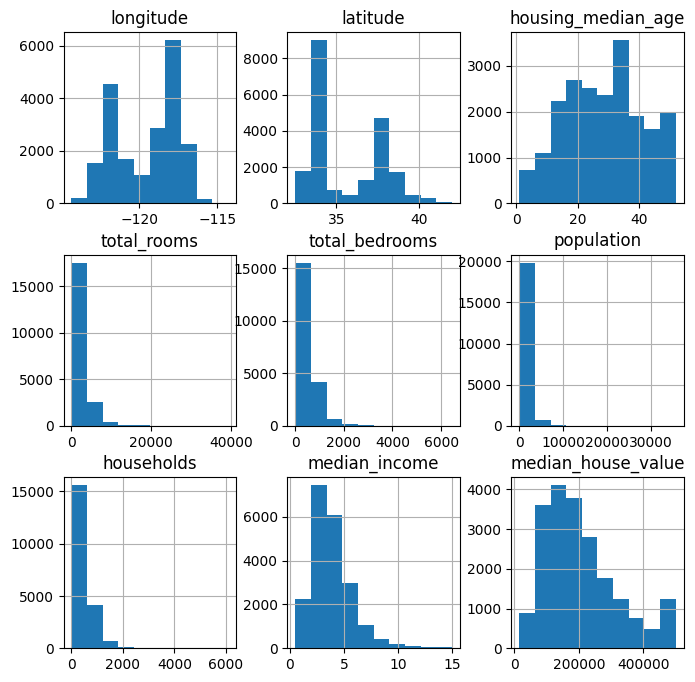

In [9]:
data.hist(figsize=(8,8))
plt.show()   # Histogram

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

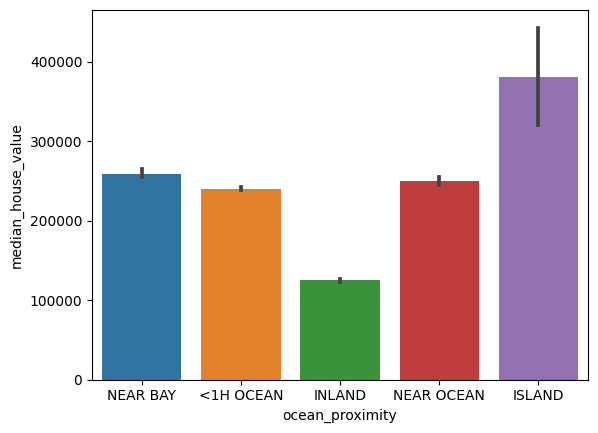

In [10]:
sns.barplot(x="ocean_proximity",y="median_house_value",data=data)   # barplot

In [12]:
#drop some columns like price as it is in (y) already
x = data.drop(['median_house_value', 'households','population','ocean_proximity'], axis = 1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,median_income
0,-122.23,37.88,41.0,880.0,129.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,3.8462
...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,1.8672


In [13]:
#define the input data(x) and output data(y)
y=data.drop(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'], axis = 1)
y


,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [14]:
# load the Linar Regression model from Sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
#split the data into train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [16]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,median_income
2072,-119.84,36.77,6.0,1853.0,473.0,1.4817
10600,-117.80,33.68,8.0,2032.0,349.0,6.9133
2494,-120.19,36.60,25.0,875.0,214.0,1.5536
4284,-118.32,34.10,31.0,622.0,229.0,1.5284
16541,-121.23,37.79,21.0,1922.0,373.0,4.0815
...,...,...,...,...,...,...
1099,-121.90,39.59,20.0,1465.0,278.0,3.0625
18898,-122.25,38.11,49.0,2365.0,504.0,2.6133
11798,-121.22,38.92,19.0,2531.0,461.0,4.4958
6637,-118.14,34.16,39.0,2776.0,840.0,2.5750


In [17]:
y_train

,median_house_value
2072,72000.0
10600,274100.0
2494,58300.0
4284,200000.0
16541,117900.0
...,...
1099,93800.0
18898,103100.0
11798,192600.0
6637,153500.0


In [18]:
# using isnull() function
data.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [19]:
#train the data
model.fit(x_train,y_train)

LinearRegression()

In [20]:
#test and score the model against the test data

model.score(x_test, y_test)


0.6070743103623417

conclusion:-

By using Linear Regression to predict housing prices based on various factors. However, the accuracy score of the model is not very high, so more advanced machine learning techniques and tuning the hyperparameters of the model is required.